In [16]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/Poop/REU/VersionZeroPointZero')
sys.path.append('/Users/Poop/REU/VersionZeroPointZero')
import signal as sig
import math, scipy
import scipy as sp
from scipy import signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


numpy.ndarray

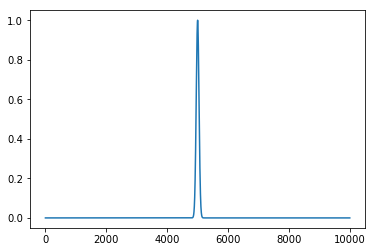

In [40]:
a = np.asarray(np.arange(0,1e4))
gauss = np.exp(-(a-5000)**2/4096.0)
plt.plot(gauss)
type(gauss)

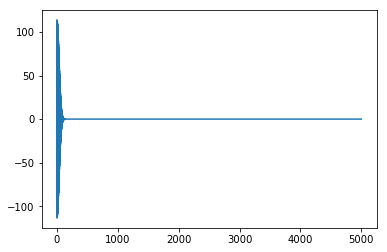

In [29]:
transform = np.fft.rfft(gauss)
plt.plot(transform)
length = len(transform)

In [49]:
def Disperse(signal,f0,DM,dt,boundary):
    # signal = array_like, not taken RFFT of yet (so in time space)
    # f0 = integer or float, central frequency, to be put into transfer function (in frequency space)
    # DM = integer or float, dispersion measure (in funky units that don't really matter here)
    # d = integer, time interval between two measurements of the signal/sample spacing (in time space)
    # boundary = integer, values to look at outside of the central frequency
    #if f0 < 400e6 or f0 > 2e9:
    #    raise ValueError('The central frequency must be in units of Hz!')
    #if type(signal) != 'np.ndarray' or 'list':
    #    raise TypeError('The signal must be an array or list of values!')
    #if type(f0) != 'float' or 'int':
    #    raise TypeError('The central frequency must be a number!')
    #if type(dt) != 'int':
    #    raise TypeError('The sample spacing dt must be an integer!')
    #if type(boundary) != 'int':
    #    raise TypeError('The boundary must be an integer!')
    #if type(DM) != 'int' or 'float':
    #    raise TypeError('The dispersion measure must be a number!')
    #TODO include some warning if d takes on certain values which would indicate the user isn't putting 
    # in values which have units of seconds
    Fourier = np.fft.rfft(signal)
    length = len(Fourier)
    values = np.linspace(-boundary,boundary,len(Fourier))
    frequencies = np.fft.rfftfreq(2*len(values)-1, d=dt)
    TransferFunction = np.exp(1j*2*np.pi*4.148808e18/((frequencies+f0)*f0**2)*DM*frequencies**2)
    Shifted = TransferFunction*Fourier
    Dispersed = np.fft.irfft(Shifted)
    plt.plot(Dispersed)   
    print length
    print values
    print frequencies
    print TransferFunction
    print Shifted

5001
[ -1.00000000e+10  -9.99600000e+09  -9.99200000e+09 ...,   9.99200000e+09
   9.99600000e+09   1.00000000e+10]
[  0.00000000e+00   9.99900010e-05   1.99980002e-04 ...,   4.99750025e-01
   4.99850015e-01   4.99950005e-01]
[ 1. +0.00000000e+00j  1. +9.45376471e-20j  1. +3.78150588e-19j ...,
  1. +2.36155080e-12j  1. +2.36249590e-12j  1. +2.36344118e-12j]
[  1.13437046e+02 +0.00000000e+00j  -1.13391198e+02 +1.61352360e-14j
   1.13253763e+02 -7.13199948e-15j ...,  -7.10542736e-15 +5.41243889e-16j
   2.78481931e-27 -1.17876154e-15j   0.00000000e+00 +0.00000000e+00j]


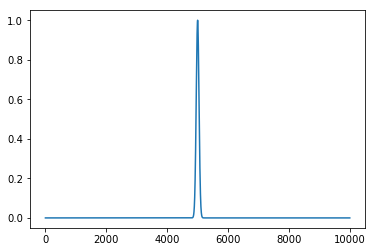

In [51]:
Disperse(gauss,820e8,200,1,100e8)